In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    classification_report, 
    accuracy_score, 
    confusion_matrix,
    precision_score,
    recall_score,
    f1_score
)
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Load your dataset
file_path = 'hf://datasets/ccosme/SentiTaglishProductsAndServices/SentiTaglish_ProductsAndServices.csv'
dataset_b = pd.read_csv(file_path)

In [5]:
# Prepare features and target
X = dataset_b['review']
y = dataset_b['sentiment']

In [7]:
# Convert text to TF-IDF features
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(X)

In [9]:
# Split the data
X_train, X_val, y_train, y_val = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

In [11]:
# Create and train the Random Forest model
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42,
    n_jobs=-1
)

In [13]:
# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_val)

In [15]:
# Calculate metrics
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred, average='weighted')
recall = recall_score(y_val, y_pred, average='weighted')
f1 = f1_score(y_val, y_pred, average='weighted')

# Print detailed metrics
print("=" * 50)
print("DETAILED METRICS")
print("=" * 50)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("\nCLASSIFICATION REPORT:")
print("=" * 50)
print(classification_report(y_val, y_pred))

DETAILED METRICS
Accuracy: 0.7598
Precision: 0.7687
Recall: 0.7598
F1 Score: 0.7510

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           1       0.71      0.82      0.76       660
           2       1.00      0.04      0.07        55
           3       0.85      0.83      0.84       686
           4       0.73      0.69      0.71       701

    accuracy                           0.76      2102
   macro avg       0.82      0.59      0.59      2102
weighted avg       0.77      0.76      0.75      2102



In [17]:
# Get feature importance
feature_names = vectorizer.get_feature_names_out()
feature_importance = pd.DataFrame({
    'feature': feature_names,
    'importance': rf_model.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

# Print top features
print("\nTOP 20 MOST IMPORTANT FEATURES:")
print("=" * 50)
print(feature_importance.head(20).to_string(index=False))

# Calculate and print class distribution
print("\nCLASS DISTRIBUTION:")
print("=" * 50)
print("Training set class distribution:")
print(pd.Series(y_train).value_counts(normalize=True).round(3))
print("\nValidation set class distribution:")
print(pd.Series(y_val).value_counts(normalize=True).round(3))


TOP 20 MOST IMPORTANT FEATURES:
feature  importance
  thank    0.022664
  ganda    0.016643
   kaso    0.016003
    you    0.014379
   pero    0.013767
 seller    0.013098
  naman    0.012166
   lang    0.010226
maganda    0.009511
     ok    0.008451
   okay    0.008333
   yung    0.008027
    not    0.007655
     ng    0.007183
  hindi    0.007018
     na    0.006959
    ang    0.006955
  super    0.006871
   good    0.006792
     sa    0.006631

CLASS DISTRIBUTION:
Training set class distribution:
sentiment
3    0.328
1    0.327
4    0.321
2    0.025
Name: proportion, dtype: float64

Validation set class distribution:
sentiment
4    0.333
3    0.326
1    0.314
2    0.026
Name: proportion, dtype: float64


Using Support Vector Machine (SVM)

In [21]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import (
    classification_report, 
    accuracy_score, 
    confusion_matrix,
    precision_score,
    recall_score,
    f1_score
)
from sklearn.svm import LinearSVC
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
# Load your dataset
file_path = 'hf://datasets/ccosme/SentiTaglishProductsAndServices/SentiTaglish_ProductsAndServices.csv'
dataset_b = pd.read_csv(file_path)

# Prepare features and target
X = dataset_b['review']
y = dataset_b['sentiment']

# Convert text to TF-IDF features
vectorizer = TfidfVectorizer(
    max_features=10000,  # Limit features to reduce complexity
    min_df=2,           # Ignore terms that appear in less than 2 documents
    max_df=0.95,        # Ignore terms that appear in more than 95% of documents
    ngram_range=(1, 2)  # Include both unigrams and bigrams
)
X_tfidf = vectorizer.fit_transform(X)

In [25]:
# Split the data with stratification
X_train, X_val, y_train, y_val = train_test_split(
    X_tfidf, 
    y, 
    test_size=0.2, 
    random_state=42,
    stratify=y  # Ensure balanced class distribution
)

# Create and train SVM model
model = LinearSVC(
    C=1.0,              # Regularization parameter
    random_state=42,
    max_iter=2000       # Increase max iterations for convergence
)

In [27]:
# Perform cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5)
print("=" * 50)
print("CROSS-VALIDATION SCORES")
print("=" * 50)
print(f"CV Scores: {cv_scores}")
print(f"Mean CV Score: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

CROSS-VALIDATION SCORES
CV Scores: [0.78656361 0.79548157 0.78061831 0.78703153 0.7769185 ]
Mean CV Score: 0.7853 (+/- 0.0127)


In [29]:
# Train the model on the full training set
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_val)

In [31]:
# Calculate metrics
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred, average='weighted')
recall = recall_score(y_val, y_pred, average='weighted')
f1 = f1_score(y_val, y_pred, average='weighted')

# Print detailed metrics
print("\nDETAILED METRICS")
print("=" * 50)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

print("\nCLASSIFICATION REPORT:")
print("=" * 50)
print(classification_report(y_val, y_pred))


DETAILED METRICS
Accuracy: 0.7845
Precision: 0.7742
Recall: 0.7845
F1 Score: 0.7764

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           1       0.80      0.82      0.81       682
           2       0.33      0.04      0.07        52
           3       0.85      0.87      0.86       689
           4       0.71      0.71      0.71       679

    accuracy                           0.78      2102
   macro avg       0.67      0.61      0.61      2102
weighted avg       0.77      0.78      0.78      2102



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


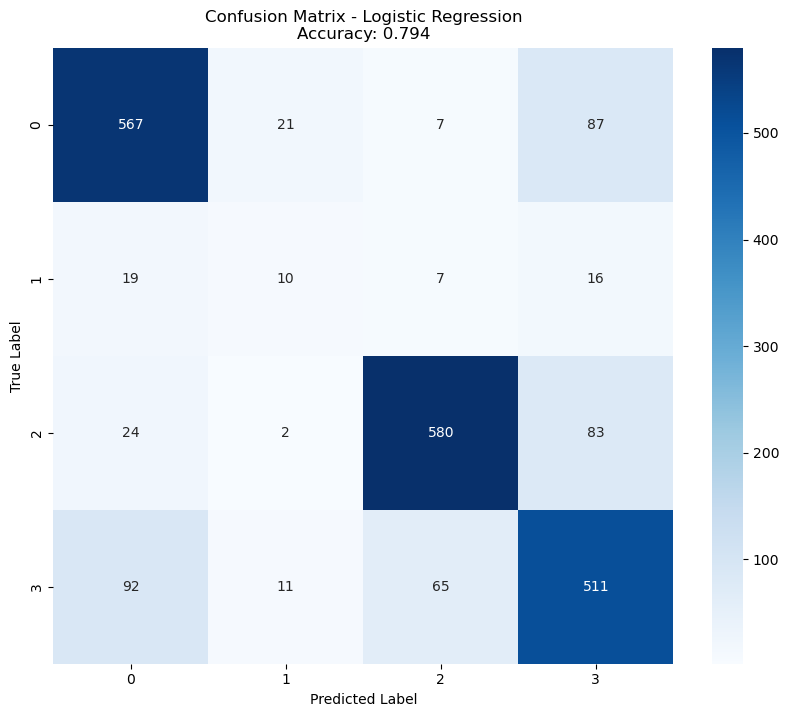


-------------------- Logistic Regression --------------------
Accuracy: 0.794

Classification Report:
              precision    recall  f1-score   support

           1       0.81      0.83      0.82       682
           2       0.23      0.19      0.21        52
           3       0.88      0.84      0.86       689
           4       0.73      0.75      0.74       679

    accuracy                           0.79      2102
   macro avg       0.66      0.65      0.66      2102
weighted avg       0.79      0.79      0.79      2102



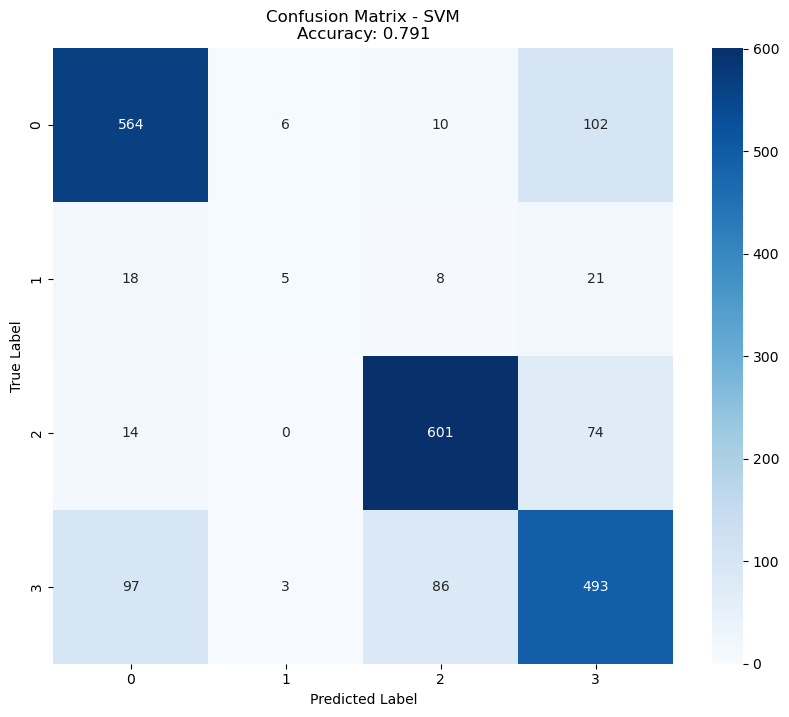


-------------------- SVM --------------------
Accuracy: 0.791

Classification Report:
              precision    recall  f1-score   support

           1       0.81      0.83      0.82       682
           2       0.36      0.10      0.15        52
           3       0.85      0.87      0.86       689
           4       0.71      0.73      0.72       679

    accuracy                           0.79      2102
   macro avg       0.68      0.63      0.64      2102
weighted avg       0.78      0.79      0.79      2102



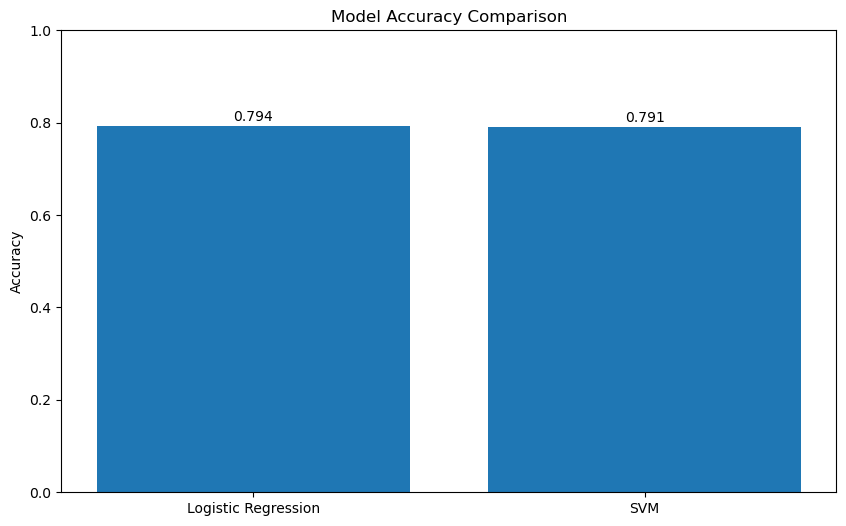

In [43]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def evaluate_models(models, X_train, X_val, y_train, y_val):
    results = {}
    
    for name, model in models.items():
        # Train and predict
        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)
        
        # Calculate accuracy
        accuracy = accuracy_score(y_val, y_pred)
        results[name] = {
            'accuracy': accuracy,
            'classification_report': classification_report(y_val, y_pred),
            'confusion_matrix': confusion_matrix(y_val, y_pred)
        }
        
        # Plot confusion matrix
        plt.figure(figsize=(10, 8))
        cm = confusion_matrix(y_val, y_pred)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.title(f'Confusion Matrix - {name}\nAccuracy: {accuracy:.3f}')
        plt.ylabel('True Label')
        plt.xlabel('Predicted Label')
        plt.show()
        
        # Print results
        print(f"\n{'-'*20} {name} {'-'*20}")
        print(f"Accuracy: {accuracy:.3f}")
        print("\nClassification Report:")
        print(results[name]['classification_report'])
    
    return results

# Evaluate both models
results = evaluate_models(models, X_train, X_val, y_train, y_val)

# Create comparison bar plot
accuracies = [results[model]['accuracy'] for model in models.keys()]
plt.figure(figsize=(10, 6))
plt.bar(models.keys(), accuracies)
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.01, f'{v:.3f}', ha='center')
plt.show()